## Data Analysis on Amazon Reviews Dataset

In [24]:
#importing pandas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import nltk
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from scipy.special import softmax
from nltk.corpus import stopwords
from wordcloud import WordCloud
from tqdm.notebook import tqdm

In [2]:
#download necessary NLP packages
nltk.download('vader_lexicon')
nltk.download('words')
nltk.download('maxent_ne_chunker')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

[nltk_data] Downloading package vader_lexicon to C:\Users\Pre-
[nltk_data]     Installed User.DESKTOP-
[nltk_data]     NMPNA3R\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package words to C:\Users\Pre-Installed
[nltk_data]     User.DESKTOP-NMPNA3R\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker to C:\Users\Pre-
[nltk_data]     Installed User.DESKTOP-
[nltk_data]     NMPNA3R\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Pre-Installed
[nltk_data]     User.DESKTOP-NMPNA3R\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Pre-Installed User.DESKTOP-
[nltk_data]     NMPNA3R\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_p

True

In [25]:
#read csv file and load into pandas df
data_df = pd.read_csv("Amazon Reviews - US, UK, JA.csv")

In [26]:
#provide basic information on the dataframe
data_df.shape
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1553 entries, 0 to 1552
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ASIN                        1553 non-null   object 
 1   Product Name                1553 non-null   object 
 2   Product Brand               1553 non-null   object 
 3   Product URL                 1553 non-null   object 
 4   Price                       798 non-null    float64
 5   Image URL                   1553 non-null   object 
 6   Review Author               1553 non-null   object 
 7   Review Date                 1553 non-null   object 
 8   Review Header               1553 non-null   object 
 9   Review Text                 1553 non-null   object 
 10  Review Rating               1553 non-null   int64  
 11  Helpful Ratings             700 non-null    object 
 12  Review URL                  1543 non-null   object 
 13  Reviewed Product Attribute  1162 

In [27]:
#obtain unique product brand and product name listing
unique_product_brand = data_df["Product Brand"].unique()
total_unique_products = data_df["Product Name"].unique().shape[0]

print(f"Total number of unique products in dataset: {total_unique_products}")
print(f"Total number of unique product brands in dataset: {unique_product_brand.shape[0]}")

for index, product_brand in enumerate(unique_product_brand):
    print(f"{index + 1}. {product_brand}")

Total number of unique products in dataset: 49
Total number of unique product brands in dataset: 38
1. Black Rifle Coffee Company
2. High Brew Coffee
3. Wandering Bear
4. Alani Nu
5. Jay Street Coffee
6. Starbucks - RTD Coffee
7. Taylors of Harrogate
8. Taika
9. RISE Brewing Co.
10. Kirkland Signature
11. BOSS
12. Super Coffee
13. Loco Life Brew
14. Javy Coffee
15. Starbucks
16. Boost
17. STARBUCKS
18. Four Sigmatic
19. Lavazza
20. BLACK INSOMNIA COFFEE COMPANY X
21. Blue Bottle Coffee
22. Cafetinto
23. Chamberlain Coffee
24. La Colombe
25. Illy
26. GROWER'S CUP
27. C&U
28. BOSS(ボス)
29. NESCAFÉ
30. Fire(ファイア)
31. TULLY'S COFFEE(タリーズコーヒー)
32. Master Café
33. サンガリア
34. ジョージア
35. SOLIMO(ソリモ)
36. サントリー
37. 神戸居留地
38. ワンダ


In [28]:
#analysis on average review rating and price by product brand 
data_df.groupby(by="Product Brand").agg({
    "Review Rating": "mean",
    "Price": "mean"
}).sort_values(by='Review Rating', ascending=False)

,Review Rating,Price
Product Brand,,
Alani Nu,5.000000,22.990000
Javy Coffee,5.000000,2.470000
Blue Bottle Coffee,5.000000,NaN
Taika,5.000000,14.950000
NESCAFÉ,4.964286,NaN
Black Rifle Coffee Company,4.942308,2.830000
Cafetinto,4.884615,NaN
Super Coffee,4.880952,0.250000
STARBUCKS,4.857143,NaN


## Each row represents a review for a product. Description of each feature in the dataframe:

ASIN - refers to product ID,
Product Name - refers to description of product,
Product Brand - refers to brand of product,
Product URL	- URL of product on website,
Price - refers to buy price of product,
Image URL - URL of product image,
Review Author - user who wrote review,
Review Date	- timestamp of review,
Review Header - summary of review,
Review Text	- full text review of user ,
Review Rating - review score given by user, from a scale of 1-5 with 1 being lowest and 5 being highest,
Helpful Ratings	- count of votes from other users that found user's review helpful,
Review URL - URL of user review,
Reviewed Product Attribute - description of product based on flavor, size, packing,
URL	- similar to Review URL,
Market - country where product is sold from,
Review Reaction	- same as Helpful Ratings,
Input URL - same as Product URL,
Normalised Price - similar to Price but has been normalised,
Translated Text	- user review in english,
Detected Language - original language of review ,
Classified Text Label - classification based on review text,
Classified Text Score - score based on review text,

In [29]:
#columns to drop
drop_df = ["Product URL", "Image URL","Helpful Ratings", "Review URL","Price",
           "URL", "Review Reaction", "Input URL", "Normalised Price", "Detected Language", 
           "Classified Text Label", "Classified Text Score"]
data_df1 = data_df.drop(drop_df, axis=1) # drops the selected columns

In [30]:
#columns to check and remove duplicated values
data_df1 = data_df1.drop_duplicates(['ASIN', 'Product Name', 'Product Brand', 'Review Author', 'Review Date', 'Review Text', 'Market'], keep='first') # removes the duplicates from existing dataframe

In [31]:
#check basic information of transformed dataframe

data_df1.shape
data_df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 764 entries, 0 to 1542
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ASIN                        764 non-null    object
 1   Product Name                764 non-null    object
 2   Product Brand               764 non-null    object
 3   Review Author               764 non-null    object
 4   Review Date                 764 non-null    object
 5   Review Header               764 non-null    object
 6   Review Text                 764 non-null    object
 7   Review Rating               764 non-null    int64 
 8   Reviewed Product Attribute  564 non-null    object
 9   Market                      759 non-null    object
 10  Translated Text             764 non-null    object
dtypes: int64(1), object(10)
memory usage: 71.6+ KB


In [32]:
#convert review date to datetime format
data_df1['Review Date'] = pd.to_datetime(data_df1['Review Date'], format='mixed')

In [33]:
#fill null values with placeholder text
data_df1 = data_df1.fillna({'Reviewed Product Attribute': 'No product attribute', 'Market': 'Market not available'})

C:\Users\Pre-Installed User.DESKTOP-NMPNA3R\AppData\Local\Temp\ipykernel_6880\1319771470.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_df1_temp['Review Rating'].resample('M').mean().plot()


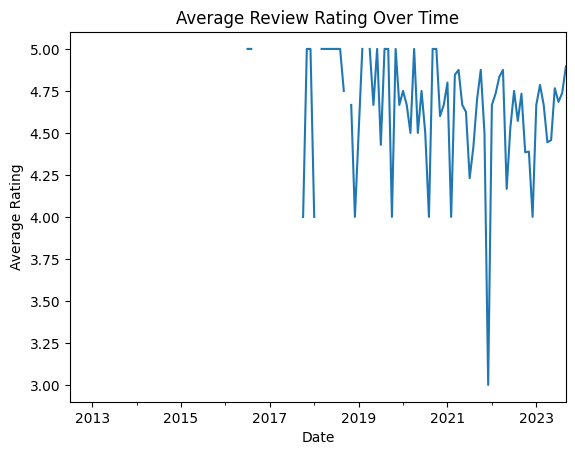

In [20]:
# Rating Trend Over Time - truncated data before 2019 hence all data before 1 Jan 2019 treated to be outlier
data_df1_temp = data_df1
data_df1_temp.set_index('Review Date', inplace=True)
data_df1_temp['Review Rating'].resample('M').mean().plot()
plt.xlabel('Date')
plt.ylabel('Average Rating')
plt.title('Average Review Rating Over Time')
plt.show()

In [34]:
# Filter out rows with 'Review Date' in 2018 or earlier (deemed outliers based on visual inspection)
data_df2 = data_df1[data_df1['Review Date'] > '2018-12-31']

Text(0.5, 1.0, 'Count of Review Rating Score')

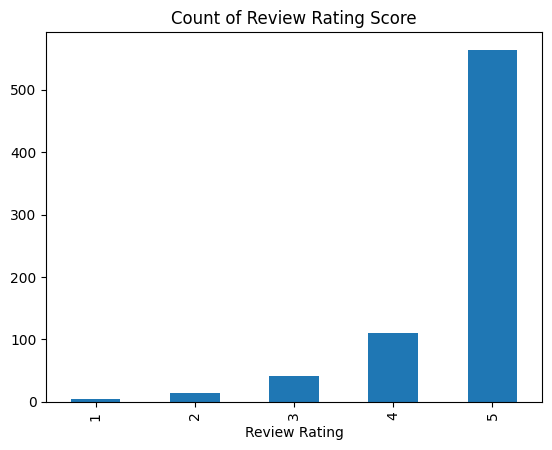

In [35]:
# Count occurrences of each review rating score
rating_occur = data_df2['Review Rating'].value_counts().sort_index()
rating_occur.columns = ['Review Rating', 'count']
rating_occur.plot(kind='bar', x='Review Rating', y='count')
plt.title('Count of Review Rating Score')

C:\Users\Pre-Installed User.DESKTOP-NMPNA3R\AppData\Local\Temp\ipykernel_6880\2526302215.py:48: UserWarning: Glyph 31070 (\N{CJK UNIFIED IDEOGRAPH-795E}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Pre-Installed User.DESKTOP-NMPNA3R\AppData\Local\Temp\ipykernel_6880\2526302215.py:48: UserWarning: Glyph 25144 (\N{CJK UNIFIED IDEOGRAPH-6238}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Pre-Installed User.DESKTOP-NMPNA3R\AppData\Local\Temp\ipykernel_6880\2526302215.py:48: UserWarning: Glyph 23621 (\N{CJK UNIFIED IDEOGRAPH-5C45}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Pre-Installed User.DESKTOP-NMPNA3R\AppData\Local\Temp\ipykernel_6880\2526302215.py:48: UserWarning: Glyph 30041 (\N{CJK UNIFIED IDEOGRAPH-7559}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Pre-Installed User.DESKTOP-NMPNA3R\AppData\Local\Temp\ipykernel_6880\2526302215.py:48: UserWarning: Glyph 22320 (\N{CJK UNIFIED IDEOGRAPH-5730}) missing fr

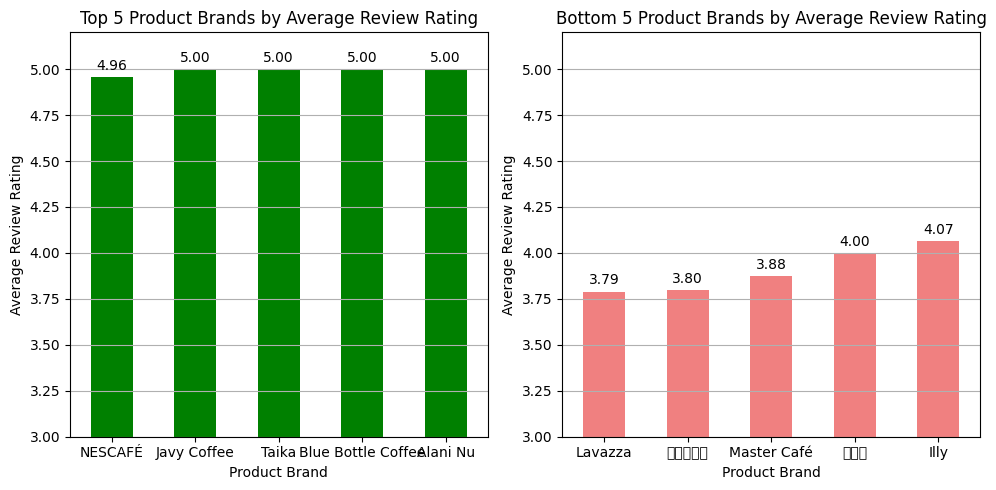

In [36]:
# Assuming your data is stored in a DataFrame named df
average_rating_by_brand = data_df2.groupby('Product Brand')['Review Rating'].mean().sort_values()

# Top 5 product brands
top_5_brands = average_rating_by_brand.tail(5)

# Bottom 5 product brands
bottom_5_brands = average_rating_by_brand.head(5)

# Plotting
plt.figure(figsize=(10, 5))

# Plot for top 5 product brands
plt.subplot(1, 2, 1)
bars = top_5_brands.plot(kind='bar', color='green')
plt.title('Top 5 Product Brands by Average Review Rating')
plt.xlabel('Product Brand')
plt.ylabel('Average Review Rating')
plt.ylim(3, 5.2)
plt.xticks(rotation=0)
plt.grid(axis='y')

# Adding labels to each bar in top 5 chart
for bar in bars.patches:
    plt.annotate(format(bar.get_height(), '.2f'),
                 (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                 ha='center', va='center',
                 size=10, xytext=(0, 8),
                 textcoords='offset points')

# Plot for bottom 5 product brands
plt.subplot(1, 2, 2)
bars = bottom_5_brands.plot(kind='bar', color='lightcoral')
plt.title('Bottom 5 Product Brands by Average Review Rating')
plt.xlabel('Product Brand')
plt.ylabel('Average Review Rating')
plt.ylim(3, 5.2)
plt.xticks(rotation=0)
plt.grid(axis='y')

# Adding labels to each bar in bottom 5 chart - the square boxes are in japanese words so you may not be able to view them
for bar in bars.patches:
    plt.annotate(format(bar.get_height(), '.2f'),
                 (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                 ha='center', va='center',
                 size=10, xytext=(0, 8),
                 textcoords='offset points')
plt.tight_layout()
plt.show()

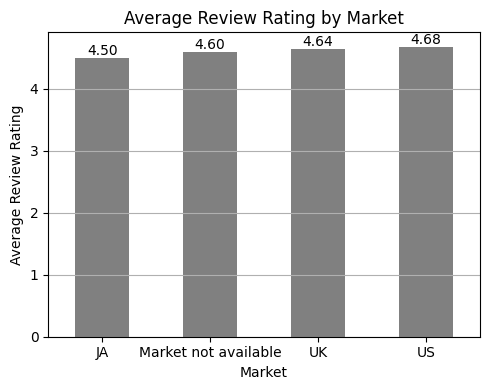

In [27]:
#perform grouping based on market ie US, UK, Japan, Others
average_rating_by_market = data_df2.groupby('Market')['Review Rating'].mean().sort_values()

# Plotting bar chart for Average Review Rating against Market
plt.figure(figsize=(5, 4))
bars = average_rating_by_market.plot(kind='bar', color='grey')
plt.title('Average Review Rating by Market')
plt.xlabel('Market')
plt.ylabel('Average Review Rating')
plt.xticks(rotation=0)
plt.grid(axis='y')

# Adding labels to each bar in chart
for bar in bars.patches:
    plt.annotate(format(bar.get_height(), '.2f'),
                 (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                 ha='center', va='center',
                 size=10, xytext=(0, 5),
                 textcoords='offset points')
plt.tight_layout()
plt.show()

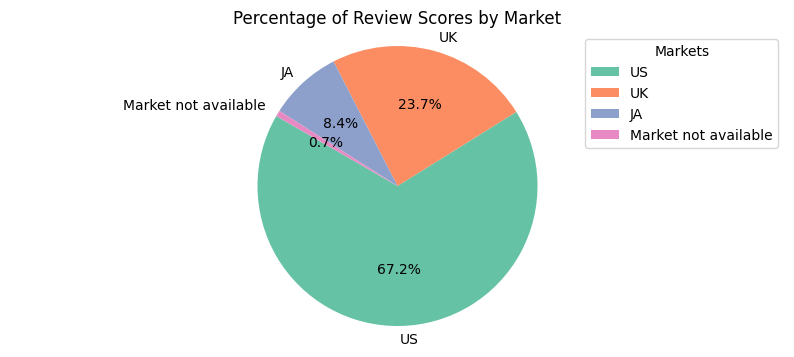

In [29]:
# Count of review scores by market
market_counts = data_df2['Market'].value_counts()

# Create the pie chart
plt.figure(figsize=(10, 4))
plt.pie(market_counts, labels=market_counts.index, autopct='%1.1f%%', startangle=150, colors=sns.color_palette('Set2', len(market_counts)), radius=13)
plt.title('Percentage of Review Scores by Market')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Add legend
plt.legend(title='Markets', loc='upper right')

plt.show()

In [17]:
# Average Rating
average_rating = data_df1['Review Rating'].mean()
print(f"Average Rating: {average_rating}")

Average Rating: 4.657068062827225


C:\Users\Pre-Installed User.DESKTOP-NMPNA3R\AppData\Local\Temp\ipykernel_23000\421956784.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_df2['Review Rating'].resample('M').mean().plot()


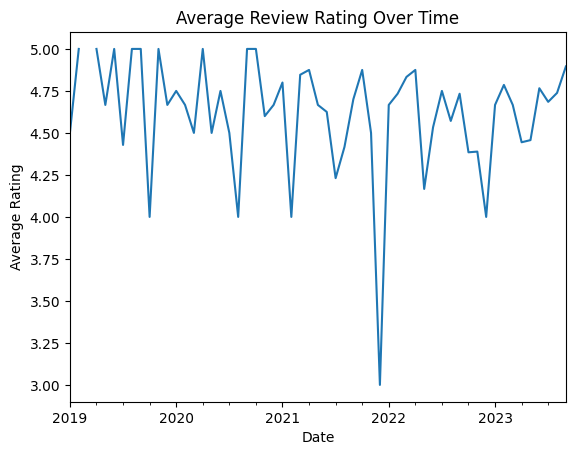

In [18]:
# Rating Trend Over Time 
data_df2.set_index('Review Date', inplace=True)
data_df2['Review Rating'].resample('M').mean().plot()
plt.xlabel('Date')
plt.ylabel('Average Rating')
plt.title('Average Review Rating Over Time')
plt.show()

C:\Users\Pre-Installed User.DESKTOP-NMPNA3R\AppData\Local\Temp\ipykernel_23000\127364117.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  rating_counts = data_df2.groupby('Review Rating').resample('Y').size().unstack(fill_value=0)


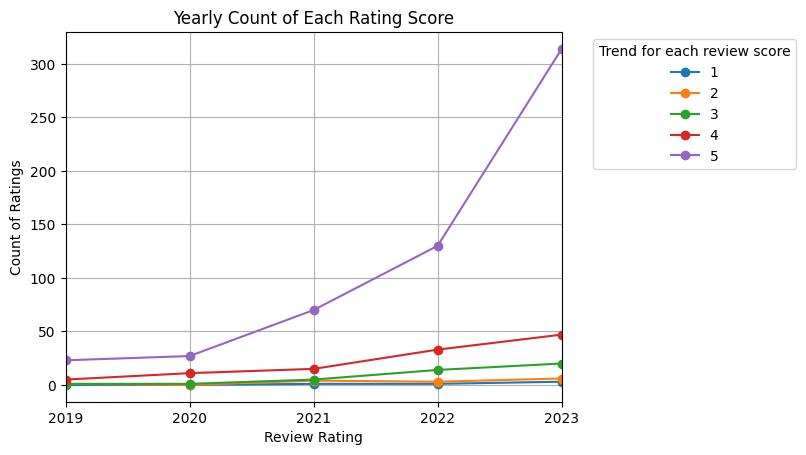

In [19]:
# Group by 'Review Rating' and resample by month to count occurrences
rating_counts = data_df2.groupby('Review Rating').resample('Y').size().unstack(fill_value=0)

# Transpose the DataFrame so that dates are the x-axis and ratings are the columns
rating_counts = rating_counts.T

# Plot the counts over time
rating_counts.plot(kind='line', marker='o')
plt.xlabel('Review Rating')
plt.ylabel('Count of Ratings')
plt.title('Yearly Count of Each Rating Score')
plt.legend(title='Trend for each review score', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

In [37]:
#print example of a random review text record
example = data_df2['Review Text'] [10]
print (example)

Though I am addicted to the sweetness of the iced matcha lattes from some chain coffee houses, I prefer this sweetness. It's not overloaded with sugar and still gives me a wonderful that gives me the extended energy I need for the day!


In [40]:
#initialzing english stop words
stp_words=stopwords.words('english')

#function to remove stop word from the given text
def clean_review(review): 
  cleanreview=" ".join(word for word in review.split() if word not in stp_words)
  return cleanreview 

#apply function to Amazon product review text
data_df2['Review Text']=data_df2['Review Text'].apply(clean_review)

C:\Users\Pre-Installed User.DESKTOP-NMPNA3R\AppData\Local\Temp\ipykernel_6880\171449338.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df2['Review Text']=data_df2['Review Text'].apply(clean_review)


In [41]:
# Create the new Sentiment column
data_df2['Sentiment'] = data_df2['Review Rating'].apply(lambda x: 0 if x <= 2 else (1 if x >= 4 else None))

# Display the first few rows to verify
print(data_df2[['Review Rating', 'Sentiment']].head())

   Review Rating  Sentiment
0              5        1.0
1              5        1.0
2              5        1.0
3              5        1.0
4              5        1.0


C:\Users\Pre-Installed User.DESKTOP-NMPNA3R\AppData\Local\Temp\ipykernel_6880\1047202873.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df2['Sentiment'] = data_df2['Review Rating'].apply(lambda x: 0 if x <= 2 else (1 if x >= 4 else None))


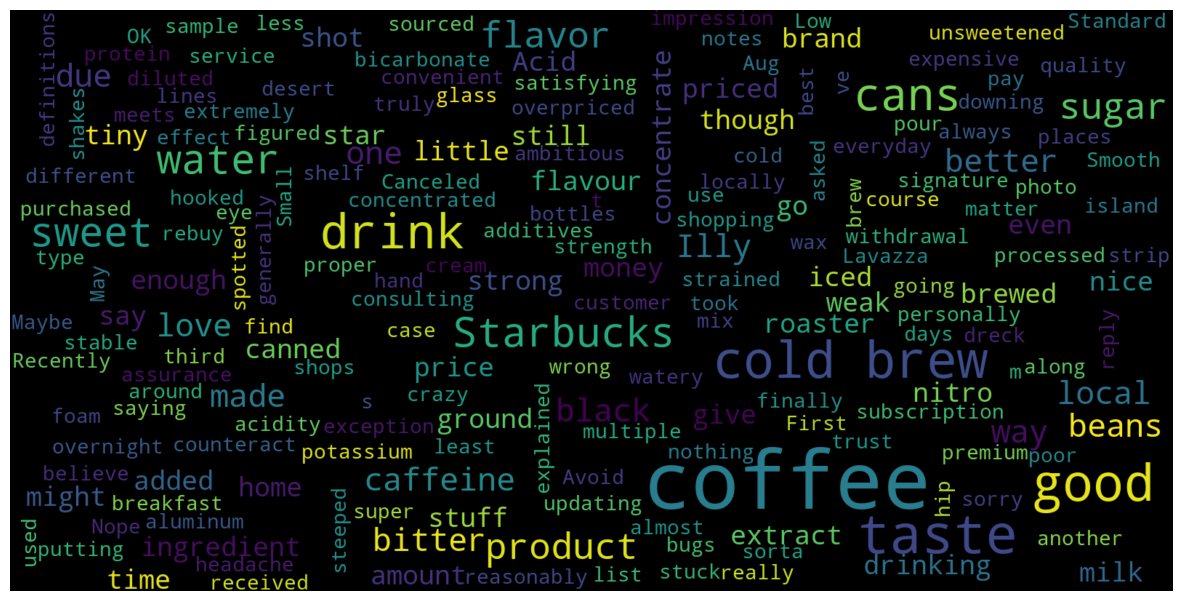

In [42]:
#wordcloud for negative(based on rating score) sentiment reviews 

consolidated=' '.join(word for word in data_df2['Review Text'][data_df2['Sentiment']==0].astype(str))
wordCloud=WordCloud(width=1600,height=800,random_state=21,max_font_size=110)
plt.figure(figsize=(15,10))
plt.imshow(wordCloud.generate(consolidated),interpolation='bilinear')
plt.axis('off')
plt.show()

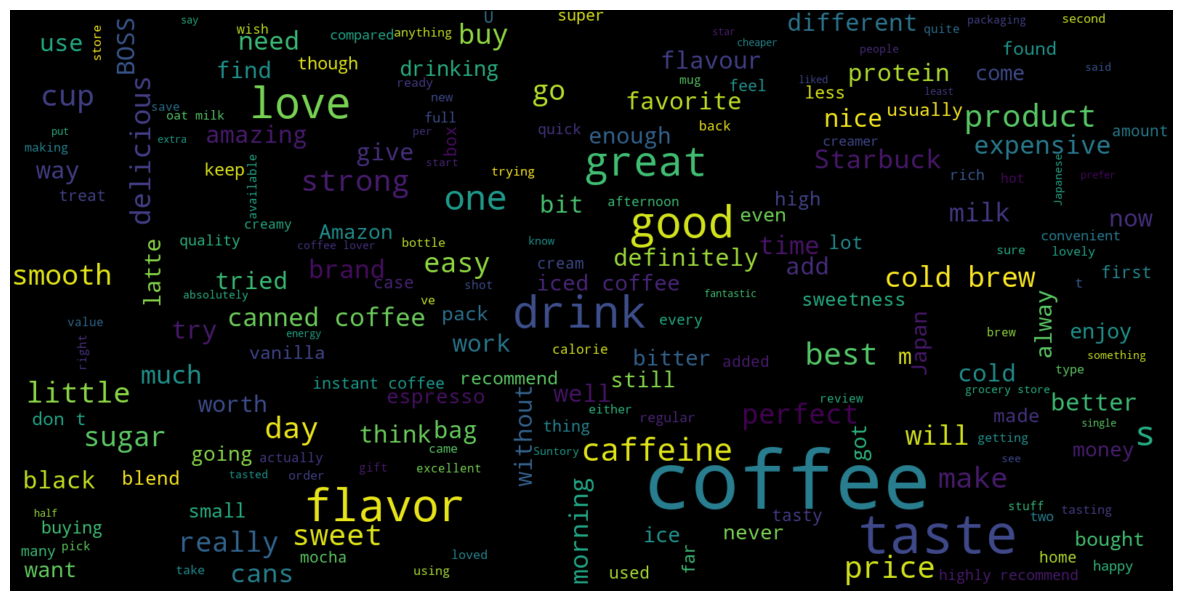

In [43]:
#wordcloud for positive (based on rating score) sentiment reviews 
consolidatedpos=' '.join(word for word in data_df2['Translated Text'][data_df2['Sentiment']==1].astype(str))
wordCloud=WordCloud(width=1600,height=800,random_state=21,max_font_size=110)
plt.figure(figsize=(15,10))
plt.imshow(wordCloud.generate(consolidatedpos),interpolation='bilinear')
plt.axis('off')
plt.show()

## Findings from wordcloud analysis

Negative keywords: strong, half, sweet, iced, Guatemala, Colombia

Positive keywords: black, sugar, blend, taste, expensive, smooth, canned

## Reasons why I am Using Transformer like Bert to perform Sentiment Analysis 

Pros:
Best at capturing context and handling complex and nuanced sentiment in text.
Ability to handle large datasets with varied and rich textual content.
Pre-trained models like BERT can be fine-tuned with small amount of task-specific data.

Cons: 
needs significant computational resources for training and inference.

In [39]:
#insert huggingface model
MODEL = f"LiYuan/amazon-review-sentiment-analysis"

In [40]:
#load pre-trained huggingface model and tokenizer from transformers library
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [45]:
#function to create polarity scores (positive, neutral, negative sentiment scores) using model and tokenizer set up
def polarity_scores_bertweet(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'bertweet_neg' : scores[0],
        'bertweet_neu' : scores[1],
        'bertweet_pos' : scores[2]
    }
    return scores_dict

In [48]:
#apply function to the dataframe iterating row by row to get polarity score results
res = {}
for i, row in tqdm(data_df2.iterrows(), total=len(data_df2)):
    try:
        text = row['Translated Text']
        myid = row['ASIN']
          
        bertweet_result = polarity_scores_bertweet(text)
        res[myid] = {**bertweet_result}
    except RuntimeError:
        print(f'Broke for id {myid}')

  0%|          | 0/735 [00:00<?, ?it/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (553 > 512). Running this sequence through the model will result in indexing errors


Broke for id B07PMNB62N


In [49]:
#transpose the results and converting to pandas dataframe
bertweet = pd.DataFrame(res).T
bertweet

,bertweet_neg,bertweet_neu,bertweet_pos
B084BN18SL,0.000439,0.000361,0.000810
B01GW3M6EQ,0.000988,0.000799,0.002765
B07CZ37V8N,0.002077,0.003228,0.017997
B0BPJZ18NS,0.000991,0.000826,0.002782
B089CDP1RK,0.002077,0.003228,0.017997
B00V57E8ZA,0.000767,0.001249,0.006599
B08T7V7YNH,0.168180,0.382327,0.390435
B08D516KNK,0.000966,0.001115,0.005586
B0BTZ96CNQ,0.002784,0.004458,0.024232
B0788DWH4Q,0.197167,0.302762,0.288134


In [50]:
#reset the index and rename index column to ASIN
bertweet = bertweet.reset_index().rename(columns={'index': 'ASIN'})

In [51]:
#perform right join - bertweet polarity results join cleaned dataframe on id column i.e. ASIN.
data_df3 = bertweet.merge(data_df2, how='right', on=["ASIN"])
data_df3

,ASIN,bertweet_neg,bertweet_neu,bertweet_pos,Product Name,Product Brand,Review Author,Review Header,Review Text,Review Rating,Reviewed Product Attribute,Market,Translated Text,Sentiment
0,B084BN18SL,0.000439,0.000361,0.000810,Black Rifle Coffee Company RTD (Espresso with ...,Black Rifle Coffee Company,hunter,This coffee is delicious,This coffee good comes coffee. It's good enoug...,5,Flavor Name: Espresso with CreamSize: 11 Fl Oz...,US,This coffee is as good as it comes for can cof...,1.0
1,B01GW3M6EQ,0.000988,0.000799,0.002765,"High Brew Coffee, medium roast, Cold Brew, Dou...",High Brew Coffee,Joyceetal,A pick me up!,"A definite jolt caffeine, strong taste.",5,Flavor Name: Dark Chocolate MochaSize: 8 Fl Oz...,US,"A definite jolt of caffeine, and a very strong...",1.0
2,B07CZ37V8N,0.002077,0.003228,0.017997,Wandering Bear Straight Black Organic Cold Bre...,Wandering Bear,Geoff Jordan,"Strong, robust flavor!!",Great robust Flavor Killer caffeine punch!!!,5,Flavor Name: Straight BlackSize: 11.00 Fl Oz (...,US,Great robust Flavor with a Killer caffeine pun...,1.0
3,B0BPJZ18NS,0.000991,0.000826,0.002782,"Alani Nu Protein Coffee, 100mg Caffeine, 10g P...",Alani Nu,Jessica Lovell,So convenient,I love protein snacks coffee perfect morning n...,5,Flavor Name: Maple,US,I love protein snacks and coffee so this is pe...,1.0
4,B089CDP1RK,0.002077,0.003228,0.017997,Wandering Bear Straight Black Organic Cold Bre...,Wandering Bear,Geoff Jordan,"Strong, robust flavor!!",Great robust Flavor Killer caffeine punch!!!,5,Flavor Name: Straight BlackSize: 11.00 Fl Oz (...,US,Great robust Flavor with a Killer caffeine pun...,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
730,B07SX9WJ42,0.001330,0.001731,0.009331,"Travel Coffee for The Coffee Lover, Brew 6 Cup...",GROWER'S CUP,Stacey Teasdale,Amazing,These amazing go hurry great taste lovely arom...,5,Style Name: Original,UK,These are amazing for on the go or if in a hur...,1.0
731,B07SX9WJ42,0.001330,0.001731,0.009331,"Travel Coffee for The Coffee Lover, Brew 6 Cup...",GROWER'S CUP,Nikki,Fantastic,Great selection coffees,5,Style Name: Original,UK,Great selection of coffees,1.0
732,B07SX9WJ42,0.001330,0.001731,0.009331,"Travel Coffee for The Coffee Lover, Brew 6 Cup...",GROWER'S CUP,Mrs C,"Really good quality, variety and flavour!!!",I bought husband fishing trips liked much home...,5,Style Name: Original,UK,I bought these for my husband for his fishing ...,1.0
733,B07SX9WJ42,0.001330,0.001731,0.009331,"Travel Coffee for The Coffee Lover, Brew 6 Cup...",GROWER'S CUP,Sarah winfield,Looks good.,Sturdy packaging. Brought stocking filler fish...,3,Style Name: Original,UK,Sturdy packaging. Brought as stocking filler f...,NaN


C:\Users\Pre-Installed User.DESKTOP-NMPNA3R\AppData\Local\Temp\ipykernel_23000\3815898617.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data_df3, x='Review Rating', y='bertweet_pos', ax=axs[0], palette="pastel")
C:\Users\Pre-Installed User.DESKTOP-NMPNA3R\AppData\Local\Temp\ipykernel_23000\3815898617.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data_df3, x='Review Rating', y='bertweet_neu', ax=axs[1], palette="pastel")
C:\Users\Pre-Installed User.DESKTOP-NMPNA3R\AppData\Local\Temp\ipykernel_23000\3815898617.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=Fa

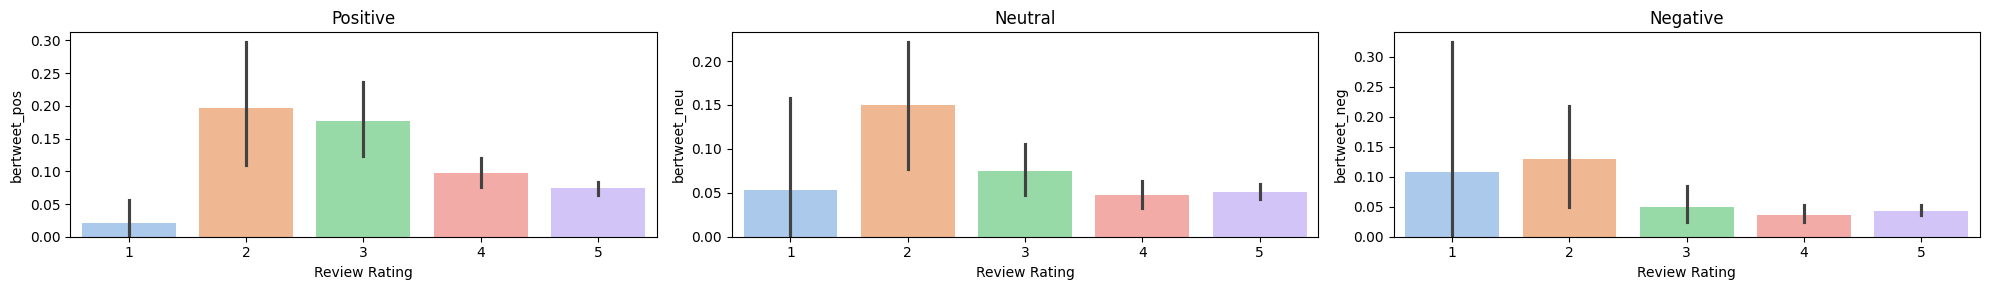

In [52]:
#plot bar chart 
fig, axs = plt.subplots(1, 3, figsize=(20, 3))
sns.barplot(data=data_df3, x='Review Rating', y='bertweet_pos', ax=axs[0], palette="pastel")
sns.barplot(data=data_df3, x='Review Rating', y='bertweet_neu', ax=axs[1], palette="pastel")
sns.barplot(data=data_df3, x='Review Rating', y='bertweet_neg', ax=axs[2], palette="pastel")
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()